# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean looks sensible based on the histogram, which is mostly concentrated around 10000 or less even though there are some data points greater than 50000.  However, the standard deviation seems very large.  This makes sense since the distribution is heavily right-tailed, but because it's so heavily right-tailed, we can easily dismiss a normal distribution, which unfortunately means we are probably dealing with something more complicated.

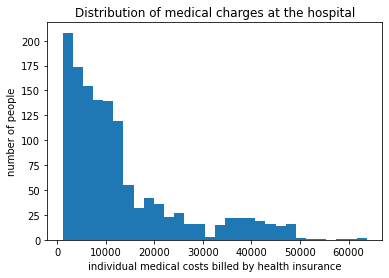

In [4]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('individual medical costs billed by health insurance')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of medical charges at the hospital')

In [6]:
mcharges_mean = medical.charges.mean()
mcharges_mean

13270.422265141257

In [7]:
mcharges_std = medical.charges.std()
mcharges_std

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Most frequentist statistical procedures (such as those which concern us here) are fundamentally justified via **mathematical theorems** that are **meant to work on random samples**.  Without random samples, the reasoning establishing the validity of frequentist hypothesis tests break down, since we need these theorems to prove that our tests can be assured work in the first place.  And when we do meet the requirements of the theorems (such as random sampling), then they do work properly.

The most appropriate frequentist test to use here is a **t-test**, because we **don't know** the population parameters, since we are concerned about what the population parameters are in the first place.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ In this case, we need to use a **one-sided** interval, since we are **only** interested in whether the mean of the medical charges drops **BELOW** a certain value.  Only a large **negative value** can lead us to **reject the null hypothesis**.

In [9]:
mcharges_critical = (t.ppf(.95, df=1337, loc=mcharges_mean, scale=mcharges_std) - mcharges_mean)/mcharges_std
mcharges_critical

1.6459941145571317

In [11]:
mcharges_confidence95 = mcharges_mean - mcharges_critical*(mcharges_std/np.sqrt(1338))
mcharges_confidence95

12725.48718381623

We can be **95% confident** that the true **mean of the charges** at the hospital is **over 12000**, and probably we can be much more than 95% confident because our confidence interval is significantly above 12000.  The Administrator **should not** be **concerned**.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ **Null hypothesis**: People with insurance are **not** being charged different amounts than those without insurance.

**Alternative hypothesis**: People with insurance **REALLY ARE** being charged different amounts than those without insurance.

An **independent or two-sample t-test** like this one assumes **homogeneity of variance**, which basically means that the **standard deviations** of the samples should be **approximately equal**.  There are some ways to overcome this assumption, and often those aren't even necessary because apparently the test is reasonably **robust to violation** of this assumption as long as the **sample sizes are relatively similar**.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [16]:
insurance_with = medical[medical['insuranceclaim'] == 1]
insurance_without = medical[medical['insuranceclaim'] == 0]

std_pooled_numer1 = (len(insurance_with) - 1)*(insurance_with.charges.std())**2
std_pooled_numer2 = (len(insurance_without) - 1)*(insurance_without.charges.std())**2
std_pooled_denom = len(insurance_with) + len(insurance_without) - 2

std_pooled = np.sqrt((std_pooled_numer1 + std_pooled_numer2)/std_pooled_denom)
std_pooled

11520.034268775256

In [17]:
t_stat_numer = insurance_with.charges.mean() - insurance_without.charges.mean()
t_stat_denom = std_pooled * np.sqrt(1/len(insurance_with) + 1/len(insurance_without))

t_stat = t_stat_numer/t_stat_denom
t_stat

11.89329903087671

Calculating this **p-value** is almost always done by **software** (I searched practically the entire internet and it could not tell me how to do it manually, such as what to use for the "loc" of the cdf distribution given that we have two samples).  However, our **t statistic is so large** (11.893) that it doesn't even show up on any t statistic tables (it's literally **off the charts**).  That means our **p value** is so small that it's **essentially 0**, which is also what our ttest_ind tells us (it calculates with e-31, a vanishingly small value).  That means our Administrator is almost certainly correct; people with insurance are being charged differently than those without insurance.  We can **reject the null** with great certainty.

In [22]:
from scipy.stats import ttest_ind
ttest_ind(insurance_with.charges, insurance_without.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is **no such function** to perform a z-test from a sample.  This is because a **z-test** has an entirely **different purpose**: it's used to validate a hypothesis that a sample drawn belongs to a specific population, and it **requires population parameters**.  A sample is not sufficient to perform a z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test